In [14]:
import numpy as np

In [1]:
import tensorflow as tf

In [85]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist
# Take all samples up to 5000 from the end
x_train, y_train = x_train_full[:-5000], y_train_full[:-5000]
x_valid, y_valid = x_train_full[-5000:], y_train_full[-5000:]
display(x_train.shape)

x_train, x_valid, x_test = x_train / 255, x_valid / 255, x_test / 255
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

(55000, 28, 28)

In [3]:
from matplotlib import pyplot as plt

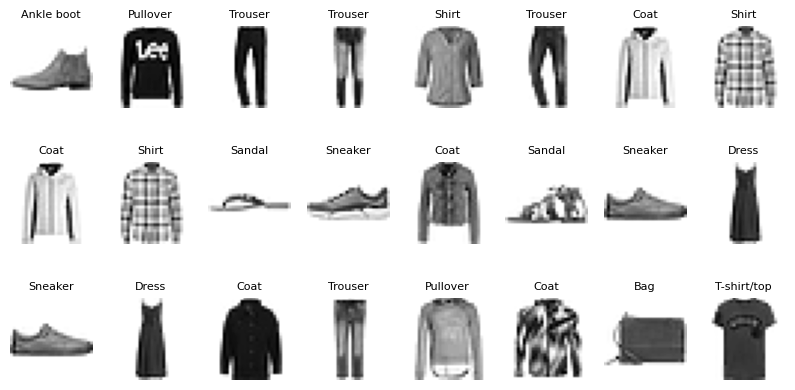

In [86]:
fig, axes = plt.subplots(3, 8, figsize=(10, 5), squeeze=False)
for y in range(3):
    for x in range(8):
        ax: plt.Axes = axes[y][x]
        index = y * 6 + x
        ax.imshow(x_test[index], cmap='binary')
        ax.set_axis_off()
        ax.set_title(class_names[y_test[index]], fontdict=dict(fontsize=8))

In [87]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [88]:
weights, biases = model.layers[1].get_weights()
print('Biases (init with 0):\n', set(biases))
print('\nWeights (init with random):\n', weights)
print('Biases shape:', biases.shape)
print('Weights shape:', weights.shape)

Biases (init with 0):
 {0.0}

Weights (init with random):
 [[ 5.3297073e-02  2.4198458e-02 -2.1023259e-02 ...  3.5795525e-02
  -7.2061256e-02  4.6089381e-02]
 [ 2.2632368e-02  5.9892908e-03  1.4587238e-02 ...  8.7194145e-03
   4.9419701e-05  2.4750374e-02]
 [-4.4513181e-02  4.6743892e-02  1.0291643e-02 ... -4.6910450e-02
   1.4408320e-02  5.3473756e-02]
 ...
 [-6.0724389e-02 -2.6091568e-02 -2.8863657e-02 ...  4.1813411e-02
   3.5757974e-02  7.3892877e-02]
 [-4.4557646e-02 -5.9672445e-02  6.5973431e-02 ... -5.0661370e-02
  -2.6788648e-02  5.1353276e-02]
 [-1.4996272e-02  1.0063291e-02 -3.2075007e-02 ...  5.3060532e-02
   6.6655308e-02 -6.4764827e-02]]
Biases shape: (300,)
Weights shape: (784, 300)


In [89]:
# For full options:
# loss:         https://keras.io/api/losses/
# optimizer:    https://keras.io/api/optimizers
# metrics:      https://keras.io/api/metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [90]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30


2023-06-03 18:43:22.078782: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 12s 6ms/step - loss: 0.7239 - accuracy: 0.7616 - val_loss: 0.5026 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4889 - accuracy: 0.8305 - val_loss: 0.4501 - val_accuracy: 0.8362
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4418 - accuracy: 0.8444 - val_loss: 0.4228 - val_accuracy: 0.8548
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4163 - accuracy: 0.8539 - val_loss: 0.3933 - val_accuracy: 0.8598
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3954 - accuracy: 0.8613 - val_loss: 0.3903 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3788 - accuracy: 0.8666 - val_loss: 0.3916 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3662 - accuracy: 0.8699 - val_loss: 0.3654 - val_accuracy: 0.8

## Regression with MLP (multi-layer perceptron)

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('../ch02/data/housing/housing.csv')
x = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = data['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
num_features = x_train.shape[1:]
tf.keras.utils.set_random_seed(42)
# This layer the same thing as sci-kit learn's StandardScaler.
# Must call `adapt` on this layer before calling `fit`
norm_layer = tf.keras.layers.Normalization(input_shape=num_features)
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(x_train)
history = model.fit(x_train, y_train, epoch=20, validation_data=(x_valid, ))
